<p align="center">
  <a href="https://imc.uc.cl" target="_blank">
    <img src="attachment:image.png" alt="IMC" width="220">
  </a>
</p>

# IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Actividad 09 - Aprendizaje supervisado: regresiones</center></h1>

Esta actividad busca aplicar distintos tipos de regresiones simples y comprender su comportamiento.

## Instrucciones

Este Notebook contiene las instrucciones a realizar para la actividad. 

<b>Al finalizarla, deben subir el Notebook al módulo de la Actividad 09 en Canvas.</b>

## Contexto

El **porcentaje de grasa corporal** es el porcentaje de la masa total de una persona que corresponde a tejido graso. Este es un indicador de la condición física de la persona y suele ser más informativo que otros indicadores ampliamente utilizados, como por ejemplo el índice de masa corporal (IMC). 

Sin embargo, a diferencia del IMC, que se calcula únicamente a partir de la altura y el peso de la persona, no es tan directo obtener una medición precisa del porcentaje de grasa corporal. Algunos métodos usados son el pesaje subacuático, el ánalisis de impedancia biométrico (o bioimpedancia) y la absorciometría con rayos X. 

Por lo general, los métodos más prácticos de medición son los métodos **antropométricos**, que consisten en la medición de la longitud y circumferencia de distintas partes del cuerpo. Estas permiten estimar a partir de modelos estadísticos (regresiones) la densidad corporal de la persona, la cual, a su vez, se utiliza para calcular el porcentaje de grasa corporal mediante, por ejemplo, la fórmula de Siri:

$BF = (\frac{4.95}{\rho} - 4.50) \cdot 100$

donde $BF$ es el porcentaje de grasa (*body fat*) y $\rho$ es la densidad corporal.

En esta actividad, vamos a utilizar mediciones antropométricas para estimar la densidad corporal de 252 hombres con distintos tipos de regresión vistos en clases. Para esto, utilizaremos el dataset disponible en: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

## Rúbrica

- Si han logrado todo: 7.0
- Si han logrado hasta el punto 2.1: 5.0
- Menos que eso: 1.0


## 1. Inspección inicial

### 1.1 Lectura

Cargue el archivo `bodyfat.csv` en un DataFrame.

### 1.2 Correlación entre variables

Muestre un heatmap de la correlación entre todas las mediciones (columnas) de su dataset. ¿Qué puede observar de la relación de densidad corporal con el resto de las mediciones? ¿Y con el porcentaje de grasa corporal? Comente sus observaciones.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# agregue otras librearías que considere relevantes

<Axes: >

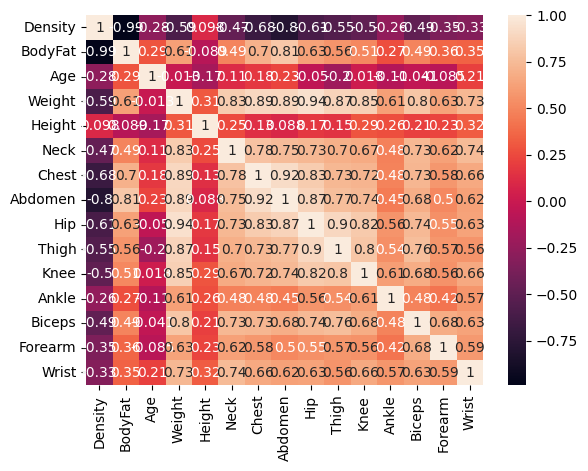

In [2]:
# respuesta
df = pd.read_csv("bodyfat.csv")
sns.heatmap(df.corr(numeric_only=True), annot=True)

Respuesta:

La relacion entre la densidad y la grasa corporal es casi directa ya que la densidad tiene el valor de 1 y su correlacion con la grasa corporal es de 0.99

otra observacion es que la correlacon de la densidad con los otros datos o partes del cuerpo, muestra las zonas donde mas se centra la densidad corporal y por lo dicho en el punto anterior, donde se concentra la grasa corporal

## 2. Regresiones

Ahora vamos a crear nuestra matriz **X** de atributos y nuestro vector **y** (target), el valor a predecir. Para **X**, considere la edad, el peso, la altura y las mediciones antropométricas, mientras que para **y** utilice el porcentaje de grasa corporal.

Luego, separe sus datos en dos sets: uno de entrenamiento y otro de testeo o prueba. Use una división de 80-20, respectivamente.

#### 2.1 Regresión Lineal

**a)** Cree y entrene un modelo de regresión lineal con el set de entrenamiento que definió. Imprima los valores de los coeficientes obtenidos y calcule el RMSE y el $r^2$ de las prediciones del set de entrenamiento y el de prueba.

* ¿Cómo son los valores de RMSE y $r^2$ de estos sets?

**b)** Genere:

* Un scatterplot que compare directamente los valores predecidos (eje X) de los reales (eje Y) para el set de prueba.

* Genere un gráfico residual (*residual plot*) para sus resultados con el set de prueba: esto es, un scatterplot cuyo eje X corresponda a los valores predecidos y su eje Y la diferencia (o residuo) entre los valores reales y los predecidos. (**Hint**: Puede utilizar el método `seaborn.residplot`)

In [11]:
# respuesta
x = df[["Age", "Weight", "Height", "Neck", "Chest", "Abdomen", "Hip", "Thigh", "Knee", "Ankle", "Biceps", "Forearm", "Wrist"]]
y = df[["BodyFat"]]

Coeficientes del modelo: [[ 0.07717916 -0.05317256 -0.09571542 -0.25130638 -0.13947584  0.96062077
  -0.12553607  0.14559611 -0.10280905  0.26851207  0.27926964  0.25092554
  -1.83826677]]


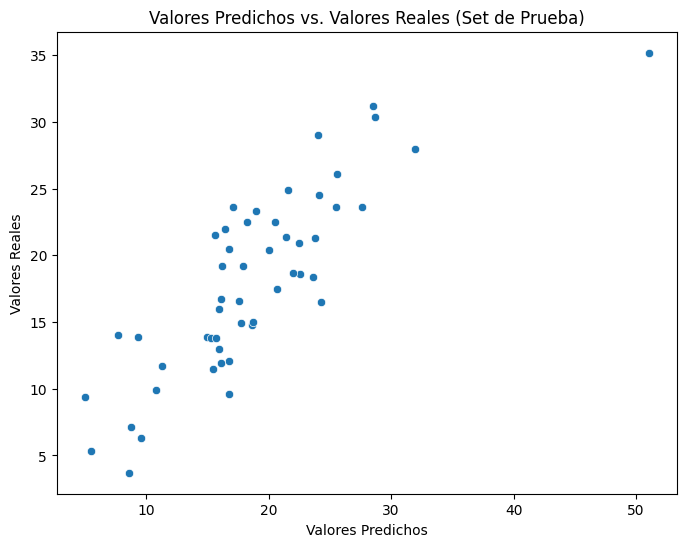

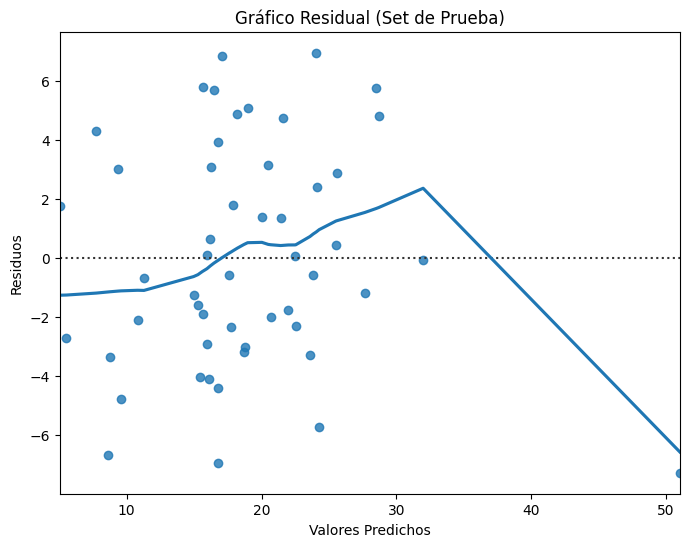

In [10]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(x_entrenamiento, y_entrenamiento)

print("Coeficientes del modelo:", modelo.coef_)

y_entrenamiento_pred = modelo.predict(x_entrenamiento)
y_prueba_pred = modelo.predict(x_prueba)

rmse_entrenamiento = np.sqrt(mean_squared_error(y_entrenamiento, y_entrenamiento_pred))
r2_entrenamiento = r2_score(y_entrenamiento, y_entrenamiento_pred)
rmse_prueba = np.sqrt(mean_squared_error(y_prueba, y_prueba_pred))
r2_prueba = r2_score(y_prueba, y_prueba_pred)



plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_prueba_pred.flatten(), y=y_prueba.values.flatten())
plt.xlabel("Valores Predichos")
plt.ylabel("Valores Reales")
plt.title("Valores Predichos vs. Valores Reales (Set de Prueba)")
plt.show()

plt.figure(figsize=(8, 6))
sns.residplot(x=y_prueba_pred.flatten(), y=y_prueba.values.flatten(), lowess=True)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico Residual (Set de Prueba)")
plt.show()

In [7]:
print(f"RMSE (entrenamiento): {rmse_entrenamiento}")
print(f"R^2 (entrenamiento): {r2_entrenamiento}")
print(f"RMSE (prueba): {rmse_prueba}")
print(f"R^2 (prueba): {r2_prueba}")

RMSE (entrenamiento): 4.256818717750332
R^2 (entrenamiento): 0.7592060017928168
RMSE (prueba): 4.240279353393864
R^2 (prueba): 0.6134842007585337


respuesta:

como nuestros valores son similares significa que nuestro modelo generaliza bien. Es decir, no solo se ajusta bien a los datos con los que fue entrenado, sino que también es capaz de hacer predicciones precisas sobre datos nuevos.

#### 2.2 Regresión Polinomial

**a)** Ahora, usando los mismos sets de entrenamiento y prueba, entrene un modelo de regresión polinomial de grado 2. 

Imprima los coeficientes de su modelo y evalúe el desempeño de su modelo mediante las mismas métricas mencionadas anteriormente, tanto para el set de entrenamiento como el de prueba.

* ¿Cómo son los valores de RMSE y $r^2$ de estos sets?
* ¿Cómo es el desempeño de este modelo en comparación con la regresión lineal? Comente porqué cree que ocurre esto.

**b)** Genere:

* Un scatterplot que compare directamente los valores predecidos (eje X) de los reales (eje Y) para el set de prueba.
* Un gráfico residual para sus resultados con el set de prueba.

In [5]:
# respuesta

respuesta

#### 2.3 Regresión Lasso

Por último, vamos a repetir nuestro proceso con un modelo de regresión lasso. Primero, queremos encontrar un valor de $\alpha$ ideal para nuestro problema. Vamos a probar con 5 posibles valores: 
$\alpha \in [0.1, 0.5, 1.0, 1.5, 2.0]$

**a)** Cree un modelo de regresión lasso para cada uno de los 5 valores de $\alpha$ entregados y seleccione el mejor valor. Recuerde que para esto, debe evaluar los modelos únicamente con el **set de entrenamiento** y quedarse con el que menor error le entrega.
(**Hint**: Puede hacer esto dentro de un ciclo `for`: asegúrese de ir guardando el mejor valor de $\alpha$)

**b)** Con el mejor valor de `alpha` que haya encontrado, entrene el modelo final e imprima las mismas métricas que para los modelos anteriores, para el set de prueba y el de entrenamiento.

**c)** Finalmente, responda: ¿con cuál de los 3 modelos creados se quedaría para ajustar estos datos?

In [6]:
# respuesta